In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from geopy.geocoders import Nominatim

In [3]:
data_frame=pd.read_csv('uber.csv')
data_frame

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
data_frame.shape

(200000, 9)

In [5]:
data_frame.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
data_frame.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [7]:
data_frame.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
data_frame.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
data_frame.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df=data_frame.copy()

In [12]:
df.dropna(subset=['dropoff_longitude','dropoff_latitude'],inplace=True)
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [14]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime']

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 199999, dtype: datetime64[ns, UTC]

In [15]:
df['pickup_year']=df['pickup_datetime'].dt.year
df['pickup_month']=df['pickup_datetime'].dt.month
df['pickup_weekday']=df['pickup_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14


In [16]:
def get_season(arg):
  if arg in [12,1,2]:
    return 'Winter'
  elif arg in [3,4,5]:
    return 'Spring'
  elif arg in [6,7,8]:
    return 'Summer'
  else:
    return 'Autumn'

df['pickup_Season']=df['pickup_month'].apply(get_season)
df['pickup_Season']


0         Spring
1         Summer
2         Summer
3         Summer
4         Summer
           ...  
199995    Autumn
199996    Spring
199997    Summer
199998    Spring
199999    Spring
Name: pickup_Season, Length: 199999, dtype: object

In [17]:
def get_dayperiod(arg):
  if arg>5 and arg<12:
    return 'Morning'
  elif arg>=12 and arg<17:
    return 'After Noon'
  elif arg>=17 and arg<22:
    return 'Evening'
  else:
    return 'Night'

df['pickup_dayperiod']=df['pickup_hour'].apply(get_dayperiod)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon


In [18]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,2011.742434,6.281791,3.048435,13.491387
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,1.856400,3.438933,1.946946,6.515505
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,2010.000000,3.000000,1.000000,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2012.000000,6.000000,3.000000,14.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,2013.000000,9.000000,5.000000,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,2015.000000,12.000000,6.000000,23.000000


In [19]:
df[df['fare_amount']<=0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod
20744,0.00,2015-04-22 23:25:07+00:00,-73.658897,40.805199,-73.658897,40.805199,1,2015,4,2,23,Spring,Night
22182,0.00,2010-03-20 02:59:51+00:00,-73.994366,40.755395,-73.998718,40.854853,2,2010,3,5,2,Spring,Night
63395,-5.00,2015-03-03 23:07:41+00:00,-73.992249,40.748936,-73.988518,40.748180,1,2015,3,1,23,Spring,Night
71246,-3.30,2010-02-11 21:47:10+00:00,-73.952725,40.768235,-73.949928,40.772208,2,2010,2,3,21,Winter,Evening
79903,-3.50,2015-05-01 14:43:02+00:00,-73.982430,40.775024,-73.981750,40.778439,1,2015,5,4,14,Spring,After Noon
87467,0.00,2015-01-04 03:51:13+00:00,-73.969475,40.807503,0.000000,0.000000,2,2015,1,6,3,Winter,Night
89322,-49.57,2010-03-09 08:26:10+00:00,-73.972772,40.785657,-73.972867,40.785500,5,2010,3,1,8,Spring,Morning
92063,-23.70,2010-03-12 08:49:10+00:00,-73.952740,40.768233,-74.007028,40.707338,3,2010,3,4,8,Spring,Morning
98875,-52.00,2015-03-20 21:31:14+00:00,-74.000359,40.728729,-74.005699,40.728680,5,2015,3,4,21,Spring,Evening
104080,-7.30,2010-03-09 20:25:10+00:00,-73.952623,40.766942,-73.953787,40.784882,1,2010,3,1,20,Spring,Evening


In [20]:
df.drop(df[df['fare_amount']<=0].index,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199972,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199973,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199974,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199975,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon


Latitude lines  range from 0° at the equator to 90° at the North and South Poles.


Longitude lines range from 0° at the Prime Meridian to 180° east or west.

In [21]:
df = df[
    (df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)
    &
    (df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)
    &
    (df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)
    &
    (df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)
    ]
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199972,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199973,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199974,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199975,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon


In [22]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208], dtype=int64)

In [23]:
df.drop(df[df['passenger_count']>6].index,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\2516206576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['passenger_count']>6].index,axis=0,inplace=True)


In [24]:
df[df['passenger_count']<=0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod
333,10.1,2011-08-05 07:03:08+00:00,-74.013900,40.707800,-73.992300,40.749300,0,2011,8,4,7,Summer,Morning
908,11.7,2011-09-06 12:25:19+00:00,-73.981000,40.764600,-73.962900,40.778400,0,2011,9,1,12,Autumn,After Noon
926,3.3,2012-03-26 18:11:24+00:00,-73.979978,40.765821,-73.983894,40.766873,0,2012,3,0,18,Spring,Evening
2000,15.7,2012-04-20 15:07:57+00:00,-73.975285,40.750138,-73.974729,40.783151,0,2012,4,4,15,Spring,After Noon
3011,6.1,2012-01-07 19:19:08+00:00,-73.977900,40.789100,-73.983700,40.773600,0,2012,1,5,19,Winter,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196763,3.3,2011-01-17 15:52:26+00:00,-74.000760,40.757637,-74.004852,40.751947,0,2011,1,0,15,Winter,After Noon
197069,7.3,2011-12-10 15:33:12+00:00,0.000000,0.000000,0.000000,0.000000,0,2011,12,5,15,Winter,After Noon
198837,5.7,2011-09-20 19:55:05+00:00,-73.980300,40.742800,-73.967900,40.755600,0,2011,9,1,19,Autumn,Evening
198867,12.1,2011-08-22 21:10:56+00:00,-73.996700,40.737200,-74.008500,40.704000,0,2011,8,0,21,Summer,Evening


In [25]:
df.drop(df[df['passenger_count']<=0].index,inplace=True,axis=0)
df.reset_index(inplace=True,drop=True)
df

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\66077578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['passenger_count']<=0].index,inplace=True,axis=0)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199251,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199252,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199253,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199254,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon


In [26]:
cat_columns=df.select_dtypes(include="O").columns
for i in cat_columns:
  print(f'Number uniques in {i} is: {df[i].nunique()}')
  print(f'uniques of {i} is: {df[i].unique()}')
  print()
  print("*"*20)
  print()

Number uniques in pickup_Season is: 4
uniques of pickup_Season is: ['Spring' 'Summer' 'Winter' 'Autumn']

********************

Number uniques in pickup_dayperiod is: 4
uniques of pickup_dayperiod is: ['Evening' 'Morning' 'Night' 'After Noon']

********************



In [27]:
for col in cat_columns:
  print(f'count of \'{col}\' is : \n{df[col].value_counts()}')
  print()
  print('*'*20)
  print()

count of 'pickup_Season' is : 
pickup_Season
Spring    55969
Winter    49663
Summer    46965
Autumn    46659
Name: count, dtype: int64

********************

count of 'pickup_dayperiod' is : 
pickup_dayperiod
Evening       57419
Morning       47963
After Noon    47435
Night         46439
Name: count, dtype: int64

********************



In [28]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199251,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199252,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199253,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199254,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon


In [29]:
from geopy.distance import great_circle
def get_distance(dist):
  loc1=(dist['pickup_latitude'],dist['pickup_longitude'])
  loc2=(dist['dropoff_latitude'],dist['dropoff_longitude'])
  return great_circle(loc1,loc2).km

df['Distance']=df.apply(get_distance,axis=1)
df['Distance']

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1045885449.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance']=df.apply(get_distance,axis=1)


0          1.683325
1          2.457593
2          5.036384
3          1.661686
4          4.475456
            ...    
199251     0.112210
199252     1.875053
199253    12.850337
199254     3.539720
199255     5.417791
Name: Distance, Length: 199256, dtype: float64

HAVERSINE

In [30]:
def haversine(lon1,lon2,lat1,lat2):
  lon1,lon2,lat1,lat2=map(np.radians,[lon1,lon2,lat1,lat2])

  diff_lon=lon2-lon1
  diff_lat=lat2-lat1

  km=2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(diff_lon/2.0)**2))

  return km



In [31]:
df['Haversine_distance']=haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])

df['Haversine_distance']

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\4264770111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Haversine_distance']=haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])


0          1.683323
1          2.457590
2          5.036377
3          1.661683
4          4.475450
            ...    
199251     0.112210
199252     1.875050
199253    12.850319
199254     3.539715
199255     5.417783
Name: Haversine_distance, Length: 199256, dtype: float64

In [32]:
df[['Distance','Haversine_distance']]

,Distance,Haversine_distance
0,1.683325,1.683323
1,2.457593,2.457590
2,5.036384,5.036377
3,1.661686,1.661683
4,4.475456,4.475450
...,...,...
199251,0.112210,0.112210
199252,1.875053,1.875050
199253,12.850337,12.850319
199254,3.539720,3.539715


In [33]:
((df['Distance']-df['Haversine_distance'])*1000).describe()

count    199256.000000
mean          0.028706
std           0.532355
min           0.000000
25%           0.001717
50%           0.002998
75%           0.005475
max          12.407171
dtype: float64

In [34]:
df['Distance'].describe()

count    199256.000000
mean         20.320864
std         376.848537
min           0.000000
25%           1.215422
50%           2.121970
75%           3.875872
max        8782.911013
Name: Distance, dtype: float64

(0.0, 100.0)

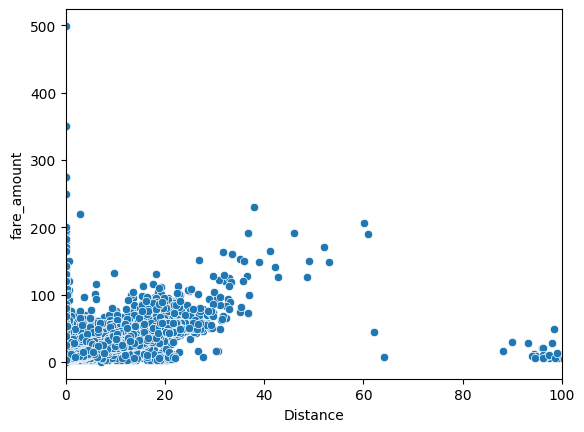

In [35]:
sns.scatterplot(x=df['Distance'],y=df['fare_amount'])
plt.xlim([0,100])

In [36]:
df[df['Distance']>60]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
345,15.5,2015-03-05 19:15:07+00:00,0.000000,0.000000,-73.979805,40.786030,1,2015,3,3,19,Spring,Evening,8666.410254,8666.398012
1064,52.0,2014-02-02 22:27:00+00:00,-73.781095,40.645015,0.000000,0.000000,1,2014,2,6,22,Winter,Night,8647.047814,8647.035598
1523,2.5,2014-05-12 12:00:15+00:00,-74.001849,40.715156,0.000000,0.000000,3,2014,5,0,12,Spring,After Noon,8666.784652,8666.772408
1942,7.0,2013-02-10 16:18:00+00:00,-0.131667,40.757063,-73.991593,40.749953,1,2013,2,6,16,Winter,After Noon,6021.122795,6021.114289
2163,5.7,2012-07-21 12:16:00+00:00,-1.216667,40.748597,-74.004822,40.734670,1,2012,7,5,12,Summer,After Noon,5941.068194,5941.059801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197123,7.0,2014-11-18 22:10:03+00:00,-73.962190,40.759158,0.000000,0.000000,1,2014,11,1,22,Autumn,Night,8664.401359,8664.389119
197827,23.5,2013-10-21 01:28:00+00:00,-73.968115,40.801455,0.000000,0.000000,2,2013,10,0,1,Autumn,Night,8665.759409,8665.747167
197925,20.1,2012-06-26 21:29:00+00:00,-0.116667,40.729775,0.000000,0.000000,5,2012,6,1,21,Summer,Evening,4528.966080,4528.959683
198660,7.0,2013-01-20 17:58:29+00:00,-67.370360,39.999790,-73.971058,40.753000,1,2013,1,6,17,Winter,Evening,565.235381,565.234582


In [37]:
df.drop(df[df['Distance']>60].index,inplace=True,axis=0)
df.reset_index(inplace=True,drop=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\3649799289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Distance']>60].index,inplace=True,axis=0)


In [38]:
df.drop(df[df['Distance']==0].index,inplace=True,axis=0)
df.reset_index(inplace=True,drop=True)
df

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1349664628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Distance']==0].index,inplace=True,axis=0)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193162,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193163,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193164,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193165,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon,3.539720,3.539715


In [39]:
df[df['fare_amount']<=1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
20957,0.01,2015-05-31 16:13:41+00:00,-73.991692,40.770802,-73.991692,40.770824,1,2015,5,6,16,Spring,After Noon,0.002545,0.002545
144208,0.11,2010-03-07 19:11:43+00:00,-73.997221,40.721345,-73.997252,40.721344,1,2010,3,6,19,Spring,Evening,0.002615,0.002615
184692,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.956960,40.780855,1,2010,3,0,18,Spring,Evening,7.130873,7.130863


In [40]:
df[(df['fare_amount']<1) & (df['Distance']>1) ]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
184692,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.95696,40.780855,1,2010,3,0,18,Spring,Evening,7.130873,7.130863


In [41]:
df.drop(df[(df['Distance']>1) & (df['fare_amount']<1)].index,inplace=True,axis=0)
df

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\265931175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['Distance']>1) & (df['fare_amount']<1)].index,inplace=True,axis=0)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193162,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193163,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193164,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193165,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon,3.539720,3.539715


In [42]:
df[(df['fare_amount']>100) & (df['Distance']<1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
1988,113.66,2014-11-01 08:42:39+00:00,-73.951227,40.778753,-73.949938,40.778149,1,2014,11,5,8,Autumn,Morning,0.127635,0.127635
5800,105.00,2011-05-06 00:40:00+00:00,-73.752265,40.923303,-73.752270,40.923303,1,2011,5,4,0,Spring,Night,0.000420,0.000420
10953,113.00,2013-12-06 02:17:00+00:00,-74.468770,40.476630,-74.468772,40.476630,2,2013,12,4,2,Winter,Night,0.000169,0.000169
14866,120.30,2011-06-02 15:17:13+00:00,-73.995309,40.769470,-73.988705,40.768919,2,2011,6,3,15,Summer,After Noon,0.559509,0.559508
15421,150.00,2014-03-23 20:09:01+00:00,-73.870154,40.969677,-73.877171,40.970619,1,2014,3,6,20,Spring,Evening,0.598372,0.598372
15860,134.29,2015-06-11 22:14:13+00:00,-73.871948,40.983791,-73.871933,40.983829,1,2015,6,3,22,Summer,Night,0.004431,0.004431
18869,180.00,2015-06-14 19:07:53+00:00,-73.567558,41.047142,-73.567596,41.047127,1,2015,6,6,19,Summer,Evening,0.003621,0.003621
42913,132.33,2013-12-28 20:52:00+00:00,-73.957087,40.926255,-73.957107,40.926252,4,2013,12,5,20,Winter,Evening,0.001713,0.001713
49318,106.50,2013-05-29 06:37:27+00:00,-74.184196,40.692321,-74.178824,40.689139,1,2013,5,2,6,Spring,Morning,0.574746,0.574746
52177,171.35,2014-01-08 01:09:06+00:00,-74.291586,40.768783,-74.291589,40.768786,1,2014,1,2,1,Winter,Night,0.000418,0.000418


In [43]:
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)
df

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\3115736108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index,axis=0,inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193137,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193138,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193139,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193140,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon,3.539720,3.539715


<Axes: xlabel='pickup_latitude', ylabel='pickup_longitude'>

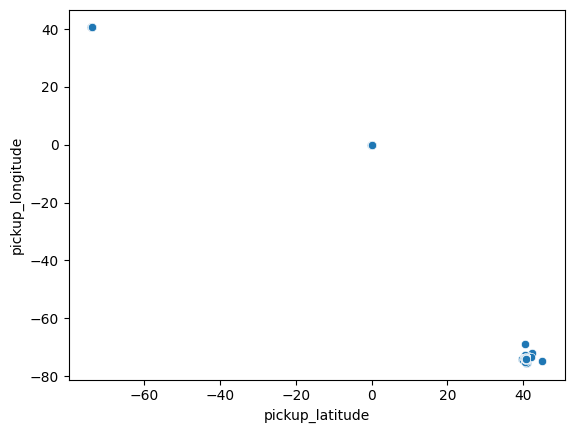

In [44]:
sns.scatterplot(x=df['pickup_latitude'],y=df['pickup_longitude'])


(35.0, 45.0)

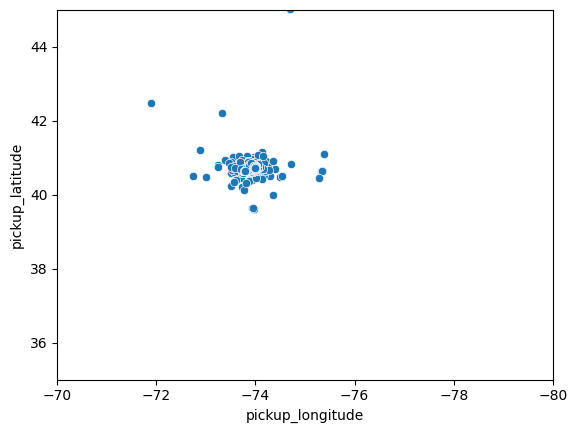

In [45]:
sns.scatterplot(x=df['pickup_longitude'],y=df['pickup_latitude'])
plt.xlim(-70,-80)
plt.ylim(35,45)

In [46]:
geocoder=Nominatim(user_agent='Get city')
result=geocoder.reverse("40,-74")
result.raw

{'place_id': 318911171,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 962550,
 'lat': 39.977818,
 'lon': -74.3319287,
 'class': 'boundary',
 'type': 'administrative',
 'place_rank': 12,
 'importance': 0.52309642633486,
 'addresstype': 'county',
 'name': 'Ocean County',
 'display_name': 'Ocean County, New Jersey, United States',
 'address': {'county': 'Ocean County',
  'state': 'New Jersey',
  'ISO3166-2-lvl4': 'US-NJ',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': [39.4751962, 40.172355, -74.553105, -73.9661052]}

(-72.0, -75.0)

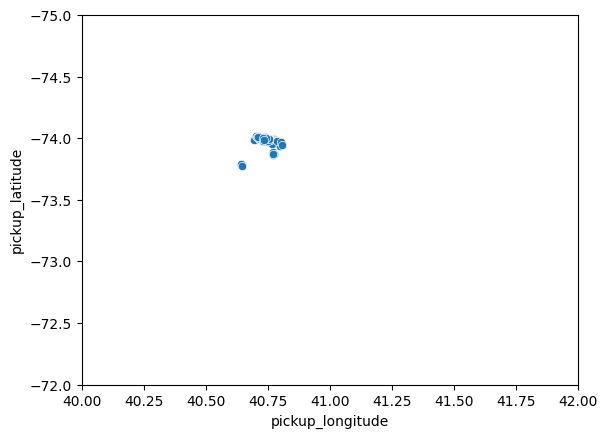

In [47]:
sns.scatterplot(x=df['pickup_longitude'],y=df['pickup_latitude'])
plt.xlim(40,42)
plt.ylim(-72,-75)

In [48]:
result=geocoder.reverse("-74.0,40.75")
print(result)

None


In [49]:
df[(df['pickup_longitude']>40) & (df['pickup_longitude']<42) & (df['pickup_latitude']>-75) & (df['pickup_latitude']<-73)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
2418,6.00,2013-05-22 10:54:00+00:00,40.746760,-73.982127,40.757287,-73.974800,1,2013,5,2,10,Spring,Morning,0.876444,0.876442
4250,12.50,2013-05-24 00:43:00+00:00,40.751797,-73.970777,40.719787,-73.992137,6,2013,5,4,0,Spring,Night,2.570203,2.570199
4297,9.50,2013-05-25 01:16:00+00:00,40.732897,-73.997740,40.747532,-73.972540,1,2013,5,5,1,Spring,Night,2.837855,2.837851
4610,6.50,2013-05-22 12:38:00+00:00,40.770667,-73.961957,40.761672,-73.967237,1,2013,5,2,12,Spring,After Noon,0.648870,0.648869
7144,10.50,2013-05-23 00:29:00+00:00,40.714897,-74.009697,40.726197,-73.994370,2,2013,5,3,0,Spring,Night,1.739113,1.739111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178232,9.00,2013-05-25 14:57:00+00:00,40.803672,-73.967302,40.778370,-73.982230,1,2013,5,5,14,Spring,After Noon,1.832641,1.832639
178956,10.50,2013-05-22 14:43:00+00:00,40.806012,-73.942590,40.785075,-73.957792,1,2013,5,2,14,Spring,After Noon,1.808784,1.808782
182573,42.33,2013-05-24 00:35:00+00:00,40.771465,-73.875495,40.755835,-73.978210,6,2013,5,4,0,Spring,Night,11.431535,11.431518
183634,57.33,2013-05-23 15:55:00+00:00,40.644182,-73.787107,40.796397,-73.975535,1,2013,5,3,15,Spring,After Noon,21.472713,21.472683


(-1.0, 1.0)

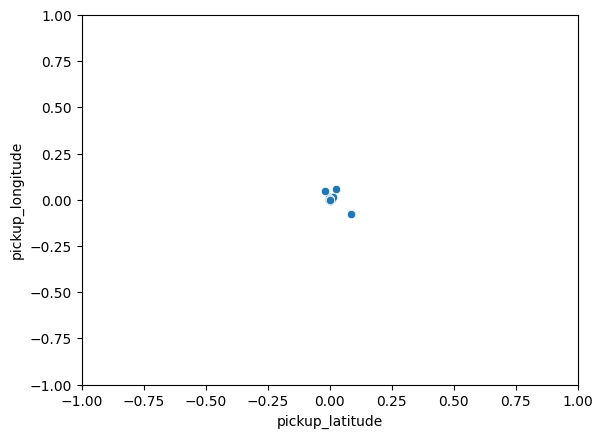

In [50]:
sns.scatterplot(x=df['pickup_latitude'],y=df['pickup_longitude'])
plt.xlim(-1,1)
plt.ylim(-1,1)

In [51]:
result=geocoder.reverse("0,0")
print(result)

None


In [52]:
df[(df['pickup_latitude']>-1) & (df['pickup_latitude']<1) & (df['pickup_longitude']>-1) & (df['pickup_longitude']<1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
159,14.50,2010-07-14 17:38:00+00:00,0.001782,0.007380,0.000875,0.005670,1,2010,7,2,17,Summer,Evening,0.215235,0.215235
22351,10.90,2010-10-09 22:53:00+00:00,-0.076468,0.087237,-0.079742,0.097257,1,2010,10,5,22,Autumn,Night,1.172143,1.172141
35432,11.70,2010-06-12 11:55:00+00:00,0.013518,0.001857,0.010920,0.010308,1,2010,6,5,11,Summer,Morning,0.983112,0.983110
36269,25.30,2011-07-13 15:32:00+00:00,0.012797,0.013382,0.038577,0.010865,1,2011,7,2,15,Summer,After Noon,2.880240,2.880236
48960,8.10,2010-11-01 18:35:00+00:00,0.009787,-0.003073,0.008988,0.005200,2,2010,11,0,18,Autumn,Evening,0.924197,0.924196
50506,6.10,2010-11-20 22:19:00+00:00,-0.003813,0.000390,-0.000655,0.000375,1,2010,11,5,22,Autumn,Night,0.351158,0.351158
57935,9.70,2011-04-19 17:41:00+00:00,0.000313,0.000385,-0.001178,0.000497,5,2011,4,1,17,Spring,Evening,0.166259,0.166259
99884,14.90,2012-01-09 07:51:00+00:00,0.059577,0.023225,0.059377,0.036153,5,2012,1,0,7,Winter,Morning,1.437702,1.437700
111498,12.90,2010-12-23 20:58:00+00:00,0.005028,0.001770,-0.006992,-0.002265,1,2010,12,3,20,Winter,Evening,1.409863,1.409861
118255,4.10,2010-05-12 23:49:00+00:00,0.002417,-0.000140,0.005163,0.000022,1,2010,5,2,23,Spring,Night,0.305873,0.305872


In [53]:
df.drop(df[(df['pickup_longitude']>40) & (df['pickup_longitude']<42) & (df['pickup_latitude']>-75) & (df['pickup_latitude'
]<-73)].index,axis=0,inplace=True)

df.drop(df[(df['pickup_latitude']>-1) & (df['pickup_latitude']<1) & (df['pickup_longitude']>-1) & (df['pickup_longitude']<1)].index,inplace=True,axis=0)

df.reset_index(inplace=True,drop=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1741617015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['pickup_longitude']>40) & (df['pickup_longitude']<42) & (df['pickup_latitude']>-75) & (df['pickup_latitude'
C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1741617015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['pickup_latitude']>-1) & (df['pickup_latitude']<1) & (df['pickup_longitude']>-1) & (df['pickup_longitude']<1)].index,inplace=True,axis=0)


<Axes: xlabel='dropoff_latitude', ylabel='dropoff_longitude'>

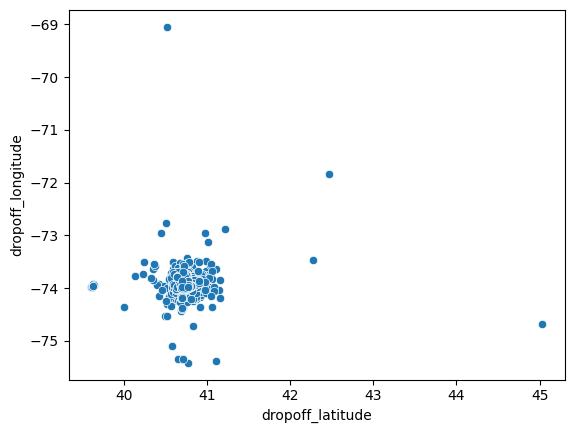

In [54]:
sns.scatterplot(x=df['dropoff_latitude'],y=df['dropoff_longitude'])

(-75.0, -74.0)

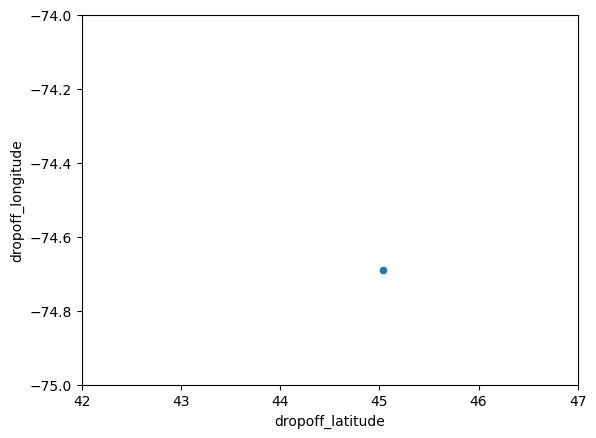

In [55]:
sns.scatterplot(x=df['dropoff_latitude'],y=df['dropoff_longitude'])
plt.xlim(42,47)
plt.ylim(-75,-74)

In [56]:
result=geocoder.reverse("45,-74.7")
result.raw

{'place_id': 339457768,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 469394411,
 'lat': 45.004747,
 'lon': -74.7024692,
 'class': 'highway',
 'type': 'residential',
 'place_rank': 26,
 'importance': 0.05338996643015179,
 'addresstype': 'road',
 'name': '',
 'display_name': 'Cornwall, Eastern Ontario, Ontario, K6H 5R7, Canada',
 'address': {'city': 'Cornwall',
  'state_district': 'Eastern Ontario',
  'state': 'Ontario',
  'ISO3166-2-lvl4': 'CA-ON',
  'postcode': 'K6H 5R7',
  'country': 'Canada',
  'country_code': 'ca'},
 'boundingbox': [45.004747, 45.007547, -74.7043382, -74.7024692]}

(-70.0, -68.0)

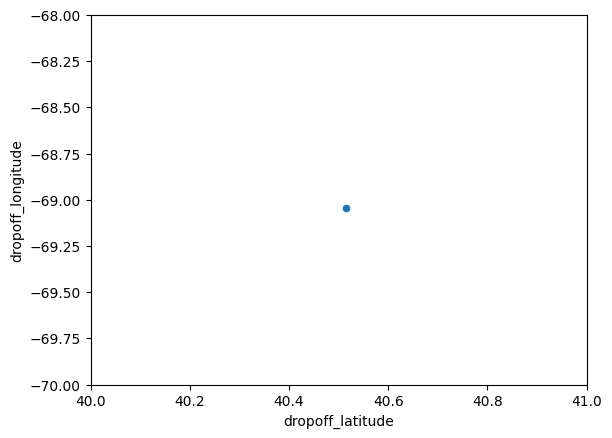

In [57]:
sns.scatterplot(x=df['dropoff_latitude'],y=df['dropoff_longitude'])
plt.xlim(40,41)
plt.ylim(-70,-68)

In [58]:
result=geocoder.reverse("40.5,-69.01")
print(result)

None


In [59]:
drop_lat=df[(df['dropoff_latitude']>40) & (df['dropoff_longitude']>-69.25)]
drop_lat

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
49137,6.5,2009-11-16 20:34:17+00:00,-69.041415,40.53289,-69.046738,40.515291,1,2009,11,0,20,Autumn,Evening,2.007976,2.007974


In [60]:
df.drop(drop_lat.index,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1248253914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(drop_lat.index,axis=0,inplace=True)


In [61]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193021,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193022,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193023,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193024,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon,3.539720,3.539715


In [62]:
num_cols=df.select_dtypes(include='number').columns
num_cols=num_cols.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'])
num_cols

Index(['fare_amount', 'passenger_count', 'pickup_year', 'pickup_month',
       'pickup_weekday', 'pickup_hour', 'Distance', 'Haversine_distance'],
      dtype='object')

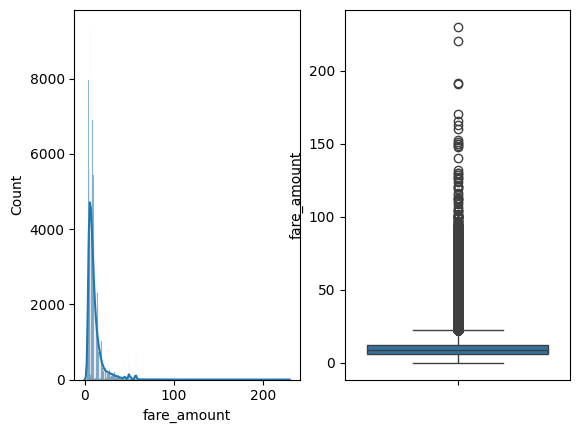

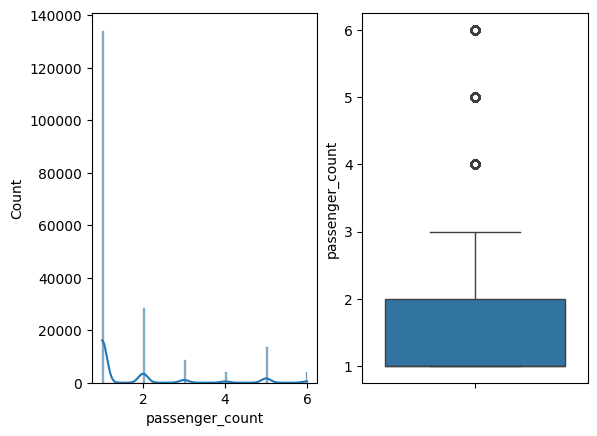

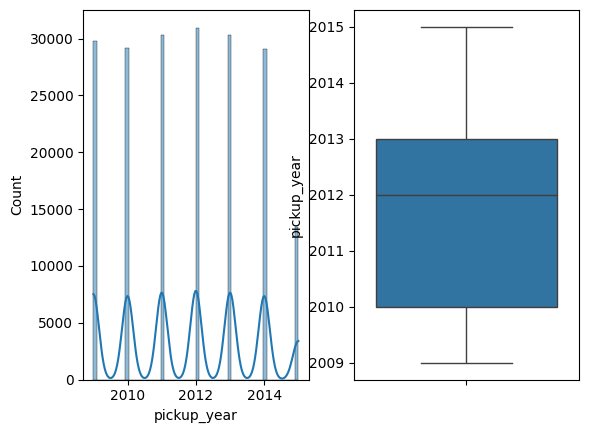

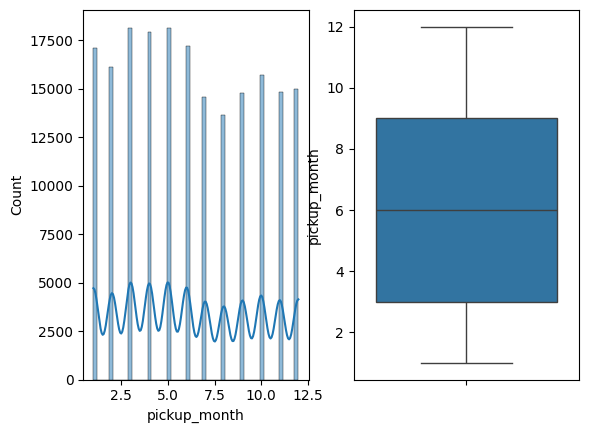

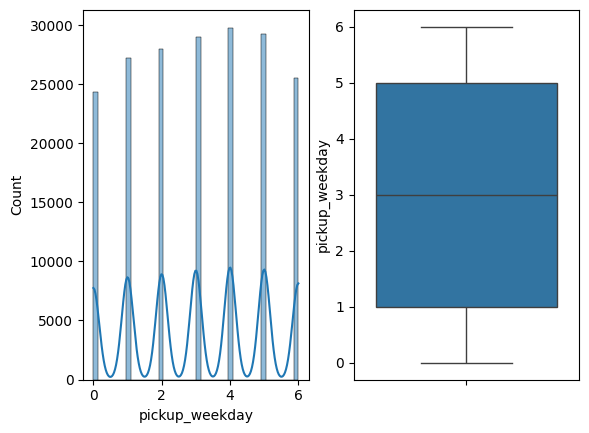

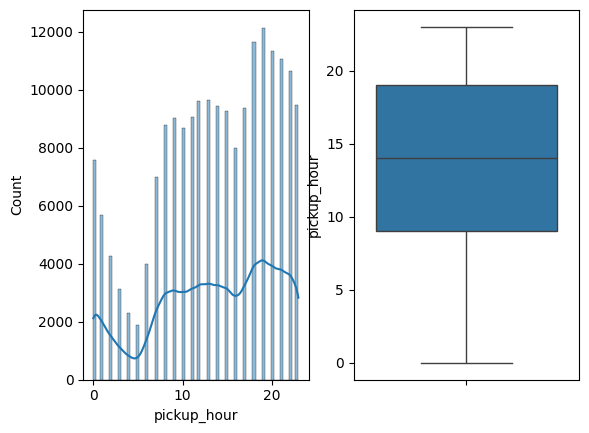

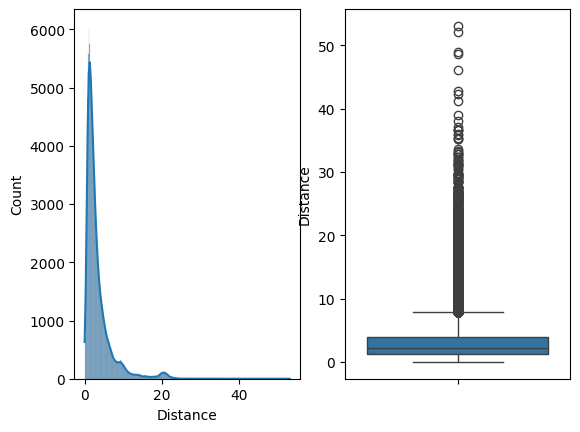

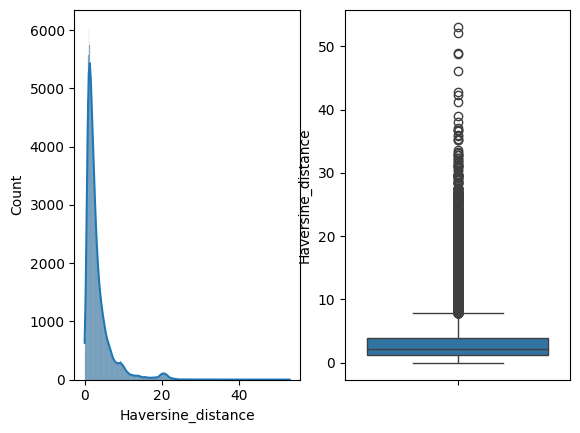

In [63]:
for col in num_cols:
  fig,axes=plt.subplots(nrows=1,ncols=2)
  sns.histplot(ax=axes[0],x=df[col],kde=True)
  sns.boxplot(df[col],ax=axes[1])
  plt.show()

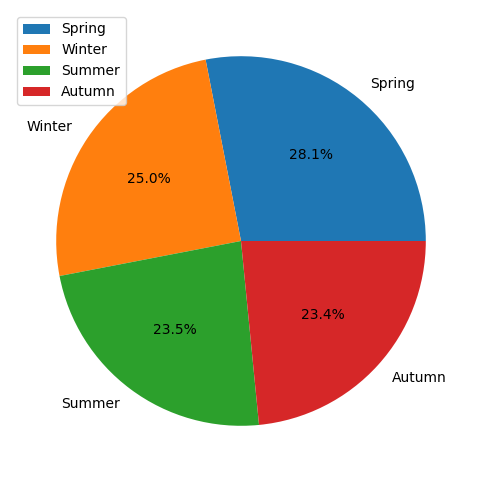

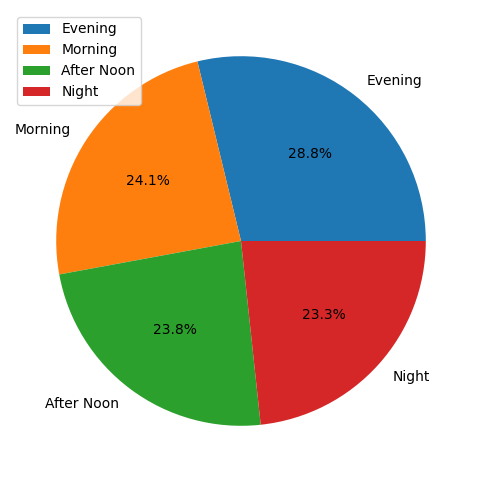

In [64]:
cat_columns=df.select_dtypes(include='O').columns

for col in cat_columns:
  plt.figure(figsize=(10,6))
  dff=df.groupby(col) ['fare_amount'].count().reset_index().sort_values(by='fare_amount',ascending=False)
  plt.pie(labels=dff[col],x=dff['fare_amount'],autopct='%1.1f%%')
  plt.legend()

plt.show()

<Axes: >

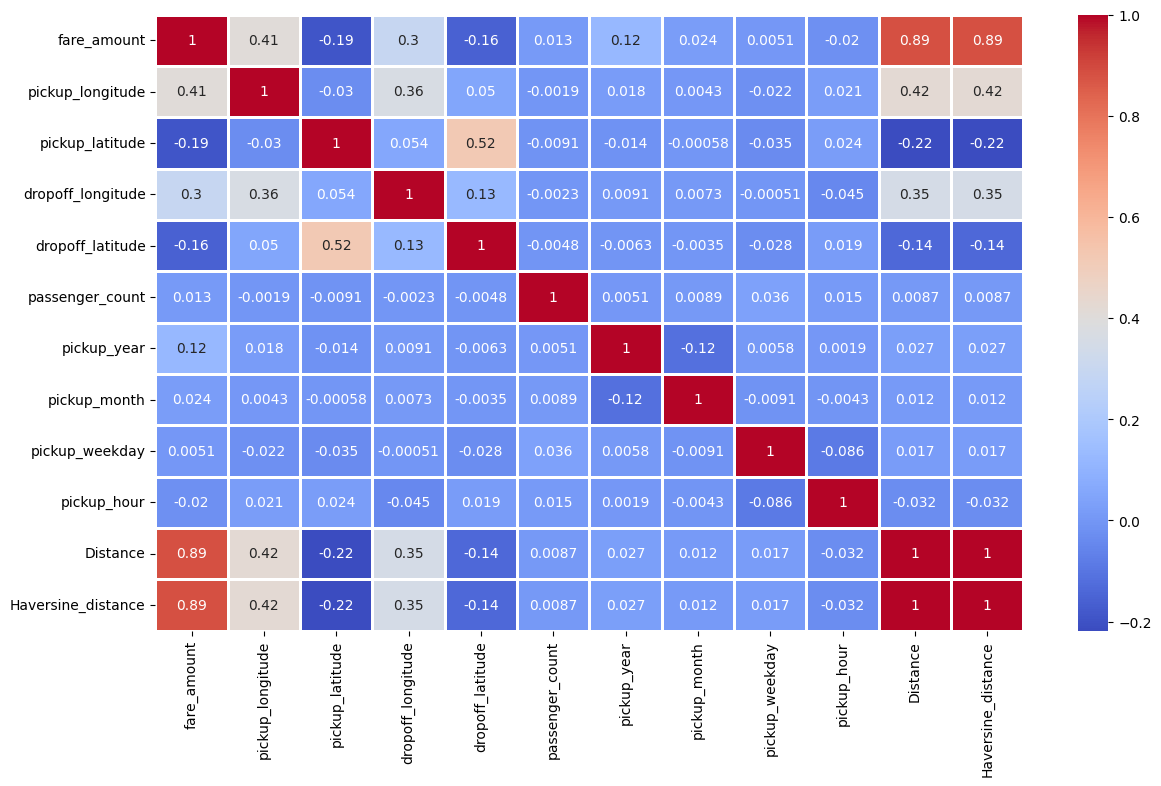

In [65]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidths=1,cmap='coolwarm')

In [66]:
dff=df.groupby('pickup_year') ['fare_amount'].mean().reset_index().sort_values(by='pickup_year')
dff

,pickup_year,fare_amount
0,2009,9.971259
1,2010,10.114996
2,2011,10.381431
3,2012,11.198855
4,2013,12.667788
5,2014,12.952063
6,2015,12.938701


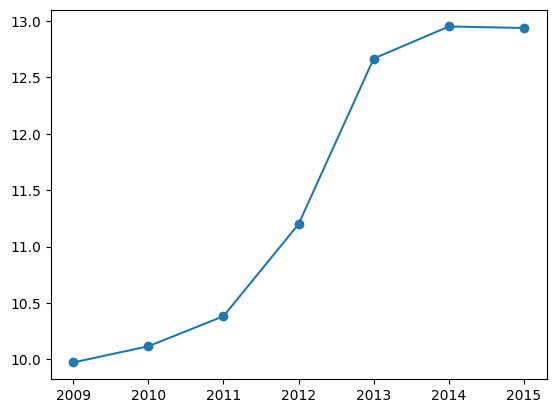

In [67]:
plt.plot(dff['pickup_year'],dff['fare_amount'],marker='o')

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1236947153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col],y=df['fare_amount'],palette='Set2')
C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1236947153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col],y=df['fare_amount'],palette='Set2')
C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1236947153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col],y=df['fare_amount'],palette='Set2')
C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1236947153.py:5: Fut

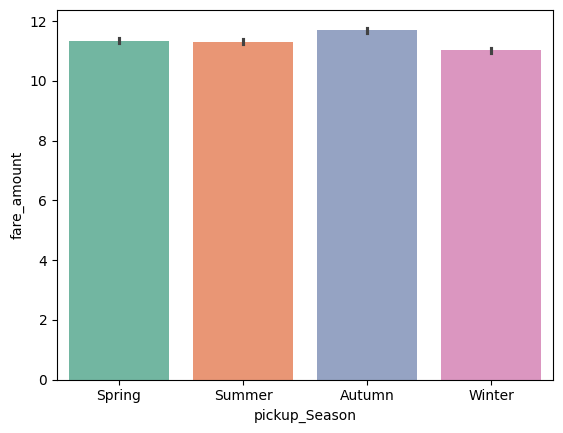

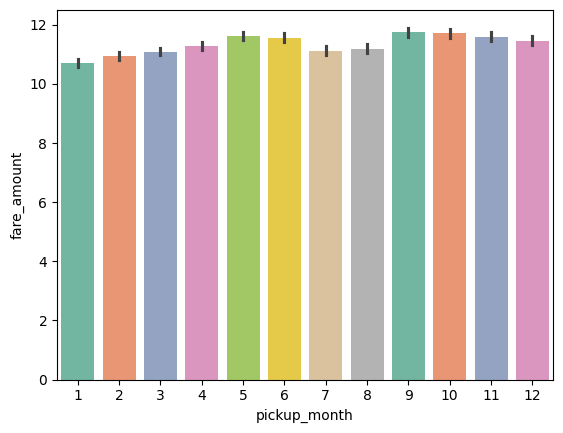

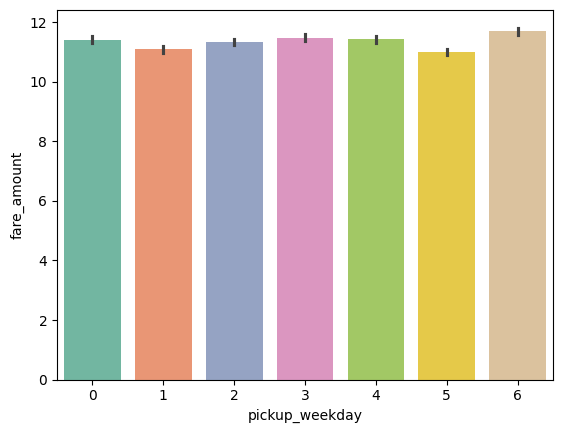

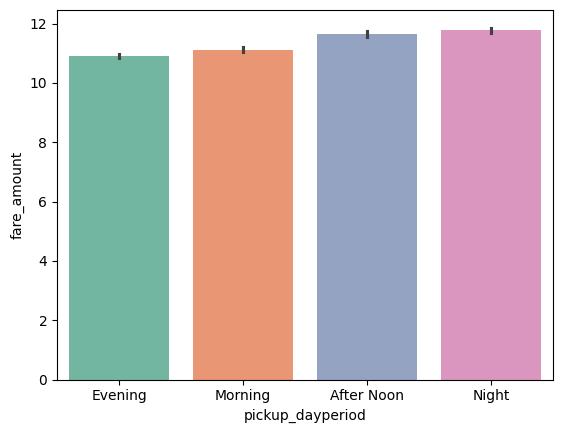

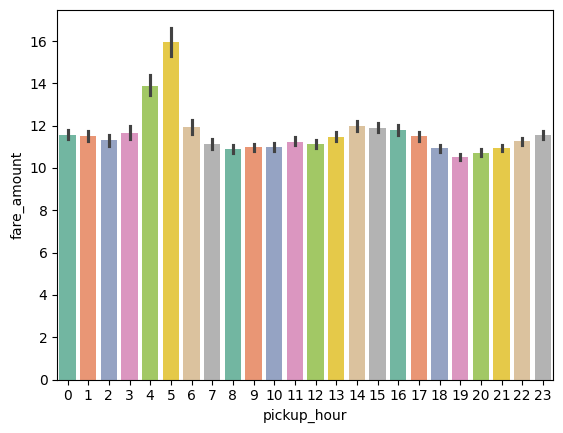

In [68]:
pickup=['pickup_Season','pickup_month','pickup_weekday','pickup_dayperiod','pickup_hour']

for col in pickup:
  plt.subplots(1)
  sns.barplot(x=df[col],y=df['fare_amount'],palette='Set2')

<Axes: xlabel='Distance', ylabel='fare_amount'>

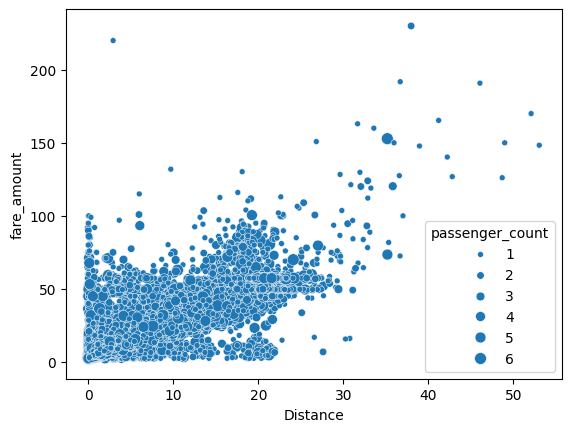

In [69]:
sns.scatterplot(x=df['Distance'],y=df['fare_amount'],size=df['passenger_count'])

In [70]:
df.drop(['pickup_datetime'],inplace=True,axis=1)
df

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\2678689873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['pickup_datetime'],inplace=True,axis=1)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening,1.683325,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening,2.457593,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening,5.036384,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193021,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193022,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193023,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193024,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon,3.539720,3.539715


In [71]:
df.drop_duplicates(inplace=True)
df

C:\Users\aksha\AppData\Local\Temp\ipykernel_19536\1725291922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance,Haversine_distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evening,1.683325,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evening,2.457593,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evening,5.036384,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evening,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193021,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193022,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193023,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193024,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,After Noon,3.539720,3.539715


In [72]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance,Haversine_distance
count,193026.000000,193026.000000,193026.000000,193026.000000,193026.000000,193026.000000,193026.000000,193026.000000,193026.000000,193026.000000,193026.000000,193026.000000
mean,11.333831,-73.975578,40.750808,-73.974603,40.751128,1.689664,2011.746231,6.283682,3.049548,13.488768,3.352538,3.352534
std,9.561322,0.036336,0.030169,0.036417,0.033791,1.305219,1.863114,3.440893,1.946568,6.516458,3.599594,3.599589
min,0.010000,-75.387785,39.605438,-75.417737,39.607967,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000084,0.000084
25%,6.000000,-73.992284,40.736475,-73.991605,40.735353,1.000000,2010.000000,3.000000,1.000000,9.000000,1.280747,1.280745
50%,8.500000,-73.982137,40.753300,-73.980582,40.753750,1.000000,2012.000000,6.000000,3.000000,14.000000,2.180727,2.180724
75%,12.500000,-73.968502,40.767534,-73.965585,40.768325,2.000000,2013.000000,9.000000,5.000000,19.000000,3.938654,3.938649
max,230.000000,-71.896038,45.031653,-71.836652,45.031598,6.000000,2015.000000,12.000000,6.000000,23.000000,53.066176,53.066101


In [73]:
x=df.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','fare_amount','Haversine_distance'],axis=1)


In [74]:
x

,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance
0,1,2015,5,3,19,Spring,Evening,1.683325
1,1,2009,7,4,20,Summer,Evening,2.457593
2,1,2009,8,0,21,Summer,Evening,5.036384
3,3,2009,6,4,8,Summer,Morning,1.661686
4,5,2014,8,3,17,Summer,Evening,4.475456
...,...,...,...,...,...,...,...,...
193021,1,2012,10,6,10,Autumn,Morning,0.112210
193022,1,2014,3,4,1,Spring,Night,1.875053
193023,2,2009,6,0,0,Summer,Night,12.850337
193024,1,2015,5,2,14,Spring,After Noon,3.539720


In [75]:
y=df['fare_amount']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)
x_train

,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance
152505,1,2015,3,3,23,Spring,Night,3.281594
56614,1,2009,2,4,22,Winter,Night,4.216486
45383,1,2011,12,5,10,Winter,Morning,2.498614
179864,1,2011,3,3,23,Spring,Night,3.308153
9351,5,2011,10,5,9,Autumn,Morning,1.135608
...,...,...,...,...,...,...,...,...
73349,1,2011,1,2,11,Winter,Morning,2.097766
109259,1,2012,4,6,11,Spring,Morning,3.660368
50057,5,2011,2,3,21,Winter,Evening,3.367924
5192,6,2014,1,5,9,Winter,Morning,2.729495


In [77]:
x_test

,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_Season,pickup_dayperiod,Distance
50899,5,2009,4,0,8,Spring,Morning,0.553136
189124,1,2012,8,4,21,Summer,Evening,1.476575
81601,1,2010,2,2,21,Winter,Evening,2.770580
29277,1,2011,6,6,8,Summer,Morning,1.027321
41831,1,2009,3,3,20,Spring,Evening,4.178158
...,...,...,...,...,...,...,...,...
161284,1,2015,3,0,7,Spring,Morning,3.778545
106962,1,2009,11,0,5,Autumn,Night,7.035700
97012,1,2013,3,6,17,Spring,Evening,2.246020
64593,1,2012,5,5,18,Spring,Evening,0.775569


In [78]:
cat_1_pipeline=Pipeline(steps=[
    ('standard',StandardScaler())
])

cat_2_pipeline=Pipeline(steps=[
    ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

num_pipeline=Pipeline(steps=[
    ('scale',RobustScaler())
])

preprocessing=ColumnTransformer(transformers=[
    ('cat_no_change',cat_1_pipeline,['passenger_count','pickup_month','pickup_weekday','pickup_hour','pickup_year']),
    ('cat_pipe',cat_2_pipeline,['pickup_Season','pickup_dayperiod']),
    ('num_pipeline',num_pipeline,['Distance'])
],remainder='passthrough',n_jobs=-1)

preprocessing

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('cat_no_change',
                                 Pipeline(steps=[('standard',
                                                  StandardScaler())]),
                                 ['passenger_count', 'pickup_month',
                                  'pickup_weekday', 'pickup_hour',
                                  'pickup_year']),
                                ('cat_pipe',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['pickup_Season', 'pickup_dayperiod']),
                                ('num_pipeline',
                                 Pipeline(steps=[('scale', RobustScaler())]),
                                 ['Distance'])])

In [79]:
x_train.dtypes

passenger_count       int64
pickup_year           int32
pickup_month          int32
pickup_weekday        int32
pickup_hour           int32
pickup_Season        object
pickup_dayperiod     object
Distance            float64
dtype: object

Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [81]:
lr_pipe=make_pipeline(preprocessing,lr)

In [82]:
lr_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('cat_no_change',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['passenger_count',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour',
                                                   'pickup_year']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['pickup_Season',
                                                   'pickup_dayperiod']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   RobustScaler())]),
                                                  ['Distance'])])),
                ('linearregression', LinearRegression())])

In [83]:
y_pred=lr_pipe.predict(x_test)
y_pred

array([3.60788793, 6.84371926, 8.71209772, ..., 8.96021287, 5.14898733,
       7.31513716])

In [84]:
r2_scores={}

In [85]:
from sklearn.metrics import r2_score,mean_squared_error
lr_r2=r2_score(y_test,y_pred)
lr_r2

0.786342543470683

In [86]:
lr_mse=mean_squared_error(y_test,y_pred)
lr_mse

19.037729222087844

In [87]:
r2_scores['linear']=lr_r2

Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=1)
dt_pipe=make_pipeline(preprocessing,dt)

In [89]:
dt_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('cat_no_change',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['passenger_count',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour',
                                                   'pickup_year']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['pickup_Season',
                                                   'pickup_dayperiod']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   RobustScaler())]),
                                                  ['Distance'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=1))])

In [90]:
dt_pred=dt_pipe.predict(x_test)
dt_pred

array([5.7, 4.5, 7.3, ..., 9.5, 6.1, 4.9])

In [91]:
dt_r2=r2_score(y_test,dt_pred)
dt_r2

0.6235446741748323

In [92]:
dt_mse=mean_squared_error(y_test,dt_pred)
dt_mse

33.543666922240064

In [93]:
r2_scores['Decision Tree']=dt_r2

In [94]:
dt_pipe2=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))

In [95]:
param_grid = {
    "decisiontreeregressor__max_depth": [5, 10, 20, None],
    "decisiontreeregressor__min_samples_split": [2, 5, 10],
    "decisiontreeregressor__min_samples_leaf": [1, 2, 5]
}

In [96]:
dt_grid=GridSearchCV(dt_pipe2,param_grid,cv=5,verbose=2,n_jobs=-1,scoring='r2')

In [97]:
dt_grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['passenger_count',
                                                                          'pickup_month',
                                                                          'pickup_weekday',
                                                                          'pickup_hour',
                                                                          'pickup_year']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',...
                                                                          'pickup_dayperiod']),
                                                                        ('num_pipeline',
                                                                         Pipeline(steps=[('scale',
                                                                                          RobustScaler())]),
                                                                         ['Distance'])])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': [5, 10, 20, None],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 5],
                         'decisiontreeregressor__min_samples_split': [2, 5,
                                                                      10]},
             scoring='r2', verbose=2)

In [98]:
print(dt_grid.best_params_)
print(dt_grid.best_estimator_)
print(dt_grid.best_score_)

{'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__min_samples_leaf': 5, 'decisiontreeregressor__min_samples_split': 2}
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('cat_no_change',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['passenger_count',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour',
                                                   'pickup_year']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                               

In [99]:
dt_pipe3=dt_grid.best_estimator_

In [100]:
dt_pipe3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('cat_no_change',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['passenger_count',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour',
                                                   'pickup_year']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['pickup_Season',
                                                   'pickup_dayperiod']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   RobustScaler())]),
                                                  ['Distance'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=5,
                                       random_state=42))])

In [101]:
dt_pred1=dt_pipe3.predict(x_test)

In [102]:
new_dt_r2=r2_score(y_test,dt_pred1)
new_dt_r2

0.8038017326947732

In [103]:
new_dt_mse=mean_squared_error(y_test,dt_pred1)

In [104]:
new_dt_mse=mean_squared_error(y_test,dt_pred1)
new_dt_mse

17.482046016433774

In [105]:
r2_scores['Decision Tree after tuning']=new_dt_r2

Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf_pipe=make_pipeline(preprocessing,rf)

In [107]:
rf_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('cat_no_change',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['passenger_count',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour',
                                                   'pickup_year']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['pickup_Season',
                                                   'pickup_dayperiod']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   RobustScaler())]),
                                                  ['Distance'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [108]:
rf_pred=rf_pipe.predict(x_test)

In [109]:
rf_r2=r2_score(y_test,rf_pred)
rf_r2

0.8009443690686324

In [110]:
rf_mse=mean_squared_error(y_test,rf_pred)
rf_mse

17.736648480991555

In [111]:
r2_scores['Random forest']=rf_r2

In [112]:
rf_pipe2=make_pipeline(preprocessing,RandomForestRegressor(random_state=42,n_jobs=-1))

In [113]:
param_grid_rf= {
    "randomforestregressor__n_estimators": [30,50],
    "randomforestregressor__max_depth": [5, 10]
}

In [114]:
rf_grid=GridSearchCV(rf_pipe2,param_grid_rf,cv=3,verbose=2,n_jobs=-1,scoring='r2')

In [115]:
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['passenger_count',
                                                                          'pickup_month',
                                                                          'pickup_weekday',
                                                                          'pickup_hour',
                                                                          'pickup_year']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['pickup_Season',
                                                                          'pickup_dayperiod']),
                                                                        ('num_pipeline',
                                                                         Pipeline(steps=[('scale',
                                                                                          RobustScaler())]),
                                                                         ['Distance'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10],
                         'randomforestregressor__n_estimators': [30, 50]},
             scoring='r2', verbose=2)

In [116]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'randomforestregressor__max_depth': 10, 'randomforestregressor__n_estimators': 50}
0.8264065580255845


In [117]:
rf_pipe2=rf_grid.best_estimator_
rf_pipe2.fit(x_train,y_train)
rf_pred2=rf_pipe2.predict(x_test)

In [118]:
new_rf_r2=r2_score(y_test,rf_pred2)
new_rf_r2

0.8154447675359602

In [119]:
new_rf_mse=mean_squared_error(y_test,rf_pred2)
new_rf_mse

16.444605300670883

In [120]:
r2_scores['Random Forest after tuning']=new_rf_r2

In [121]:
r2_scores

{'linear': 0.786342543470683,
 'Decision Tree': 0.6235446741748323,
 'Decision Tree after tuning': 0.8038017326947732,
 'Random forest': 0.8009443690686324,
 'Random Forest after tuning': 0.8154447675359602}

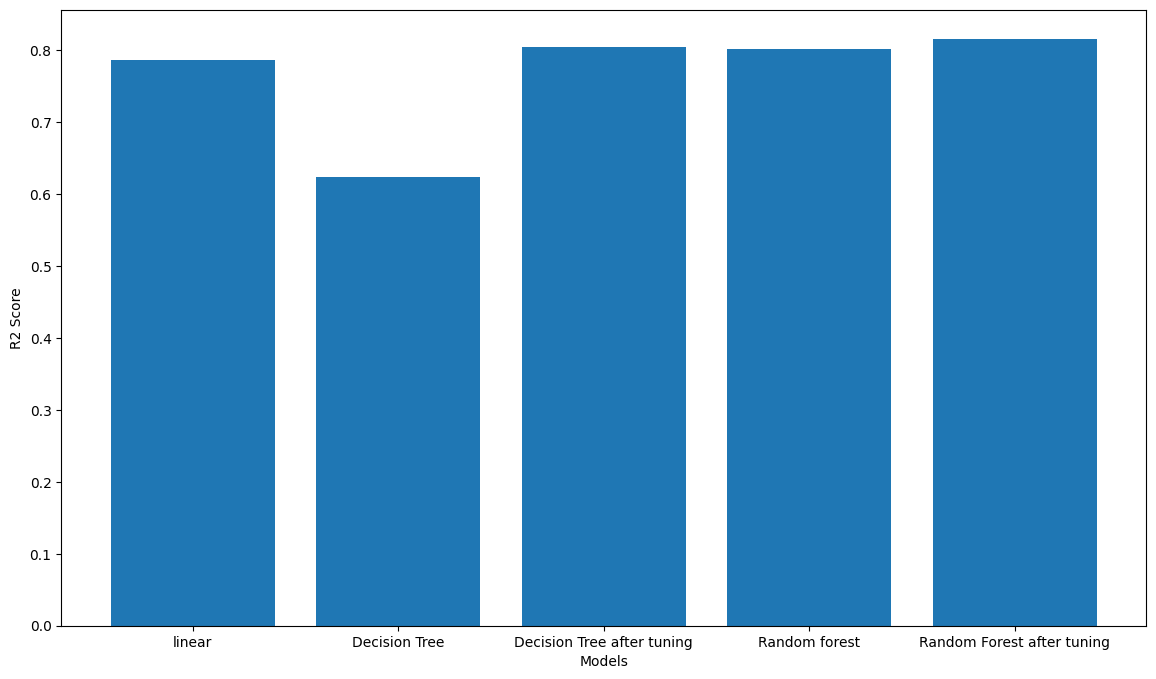

In [122]:
plt.figure(figsize=(14,8))
plt.bar(r2_scores.keys(),r2_scores.values())
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

In [123]:
new_pred=rf_pipe.predict(pd.DataFrame([[1,2015,5,3,19,'Spring','Evening',0.987056]],columns=x_test.columns))
print("Fare: ",new_pred[0])

Fare:  6.13


In [124]:
from datetime import datetime
current_datetime=datetime.now()
current_datetime


datetime.datetime(2025, 4, 18, 18, 4, 59, 953286)

In [125]:
geolocator=Nominatim(user_agent='geoapiExercise')

In [126]:
def get_coordinates(location):
    try:
        location_data = geolocator.geocode(location)
        if location_data:
            return location_data.latitude, location_data.longitude
        else:
            return "Location not found"
    except Exception as e:
        return str(e)

In [127]:
pickup_location="New York"
pickup_latitude,pickup_longitude=get_coordinates(pickup_location)
print("pickup latitude: ",pickup_latitude)
print("pickup longitude: ",pickup_longitude)

pickup latitude:  40.7127281
pickup longitude:  -74.0060152


In [128]:
dropoff_location="Jersey City"
dropoff_latitude,dropoff_longitude=get_coordinates(dropoff_location)
print("dropoff latitude: ",dropoff_latitude)
print("dropoff longitude: ",dropoff_longitude)

dropoff latitude:  40.7215682
dropoff longitude:  -74.047455


In [129]:
year=current_datetime.year
month=current_datetime.month
week_day=current_datetime.weekday()
hour=current_datetime.hour
season=get_season(month)
day_period=get_dayperiod(hour)
location=pd.DataFrame([[pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude]],
                        columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
distance=location.apply(get_distance,axis=1)[0]

In [130]:
print('year: ',year)
print('month',month)
print("week day: ",week_day)
print('hour: ',hour)
print("season: ",season)
print("day: ",day_period)
print("distance:",distance)


year:  2025
month 4
week day:  4
hour:  18
season:  Spring
day:  Evening
distance: 3.6282036734545597


In [131]:
fare=rf_pipe.predict(pd.DataFrame([[1,year,month,week_day,hour,season,day_period,distance]],columns=x_test.columns))
print("Fare: ",fare[0])

Fare:  15.265


In [132]:
x_test.columns

Index(['passenger_count', 'pickup_year', 'pickup_month', 'pickup_weekday',
       'pickup_hour', 'pickup_Season', 'pickup_dayperiod', 'Distance'],
      dtype='object')

In [133]:
st.header("Uber Trip Fare Price Prediction")

2025-04-18 18:05:02.792 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 18:05:03.700 
  command:

    streamlit run C:\Users\aksha\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-18 18:05:03.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [134]:
import pickle

In [135]:
filename='uber_trip_model.sav'
pickle.dump(lr_pipe,open(filename,'wb'))